<div align="center">
    <h1>BRIEF (Binary Robust Independent Elementary Features)</h1>
</div>

**Asignatura:** Tópicos Especiales - Visión Artificial -  0756

**Profesor:** Edmanuel Cruz

**Estudiante:** Ricardo Cuan 8-941-913

## Importar librerías y mostrar las imagenes a tratar

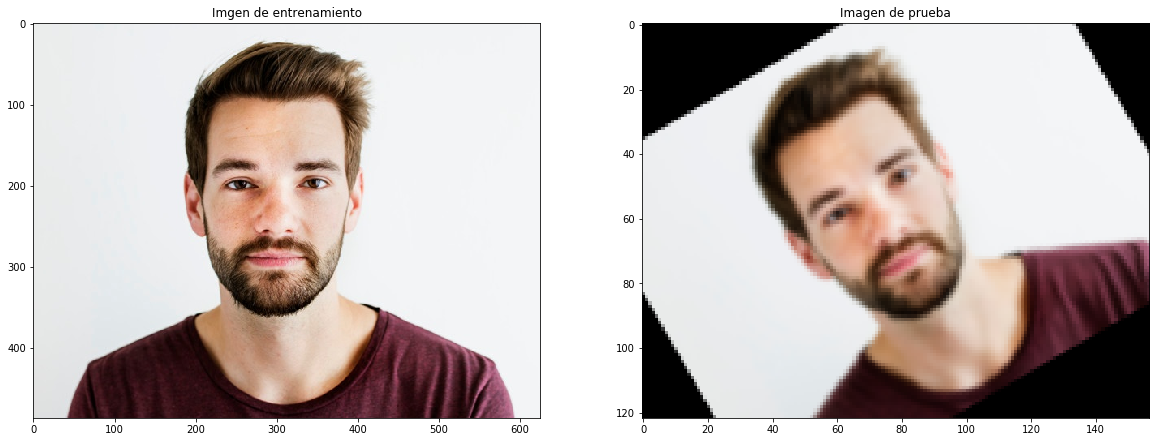

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Cargar la imagen
imagen = cv2.imread('./img.jpg')

# Convertir la imagen_de_entrenamiento a RGB
imagen_de_entrenamiento = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Convertir la imagen_de_entrenamiento a escala de grises
entrenamiento_gris = cv2.cvtColor(imagen_de_entrenamiento, cv2.COLOR_RGB2GRAY)

# Crear imagen_de_prueba añadiendo invarianza de escala e invarianza rotacional
imagen_de_prueba = cv2.pyrDown(imagen_de_entrenamiento)
imagen_de_prueba = cv2.pyrDown(imagen_de_prueba)
num_filas, num_columnas = imagen_de_prueba.shape[:2]

matrix_rotada = cv2.getRotationMatrix2D((num_columnas/2, num_filas/2), 30, 1)
imagen_de_prueba = cv2.warpAffine(imagen_de_prueba, matrix_rotada, (num_columnas, num_filas))

prueba_gris = cv2.cvtColor(imagen_de_prueba, cv2.COLOR_RGB2GRAY)


# Mostrar la imagen de entrenamiento y la imagen de prueba
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Imgen de entrenamiento")
imagen1 = plots[0].imshow(imagen_de_entrenamiento)

plots[1].set_title("Imagen de prueba")
imagen2 = plots[1].imshow(imagen_de_prueba)

## Detectar keypoints y crear descriptor

Número de keypoints detectado en la Imagen de entrenamiento:  2430
Número de keypoints detectado en la imagen de prueba:  114


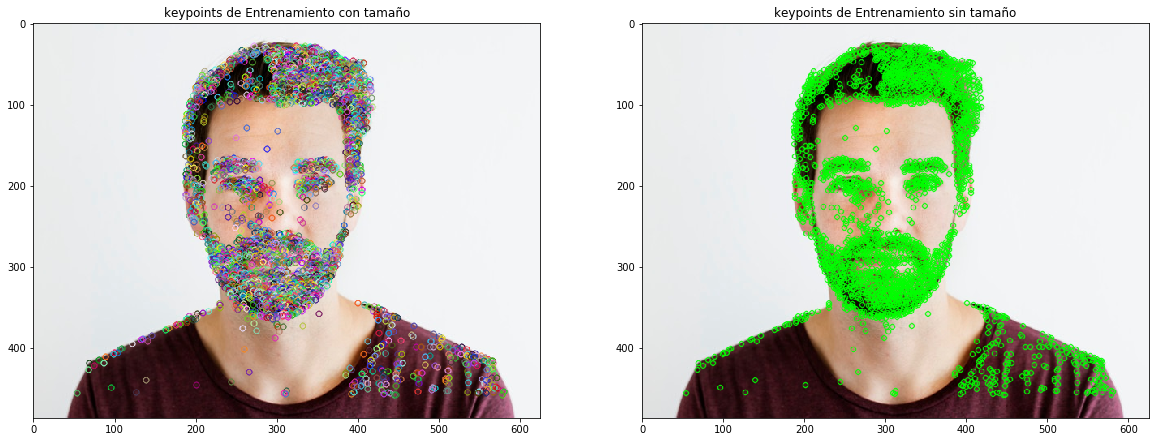

In [2]:
# Detectar keypoints y crear descriptor
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

keypoints_de_entrenamiento = fast.detect(entrenamiento_gris, None)
keypoints_de_prueba = fast.detect(prueba_gris, None)

keypoints_de_entrenamiento, descriptor_de_entrenamiento = brief.compute(entrenamiento_gris, keypoints_de_entrenamiento)
keypoints_de_prueba, test_descriptor = brief.compute(prueba_gris, keypoints_de_prueba)

keypoints_sin_tamano = np.copy(imagen_de_entrenamiento)
keypoints_con_tamano = np.copy(imagen_de_entrenamiento)

cv2.drawKeypoints(imagen_de_entrenamiento, keypoints_de_entrenamiento, keypoints_sin_tamano, color = (0, 255, 0))

cv2.drawKeypoints(imagen_de_entrenamiento, keypoints_de_entrenamiento, keypoints_con_tamano, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Mostrar imagenes de los keypoints con y sin tamaño
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("keypoints de Entrenamiento con tamaño")
plots[0].imshow(keypoints_con_tamano, cmap='gray')

plots[1].set_title("keypoints de Entrenamiento sin tamaño")
plots[1].imshow(keypoints_sin_tamano, cmap='gray')


# Imprimir el numero de keypoints detectado en la imagen de entrenamiento
print("Número de keypoints detectado en la Imagen de entrenamiento: ", len(keypoints_de_entrenamiento))

# Imprimir el numero de keypoints detectado en la imagen de prueba
print("Número de keypoints detectado en la imagen de prueba: ", len(keypoints_de_prueba))

## keypoints coincidentes

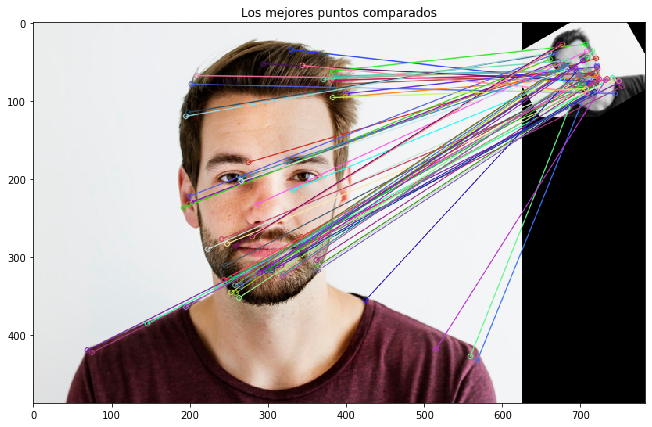


Número de keypoints iguales entre las imagenes de entrenamiento y las imagenes de prueba:  62


In [3]:
# Crear un comparador de objetos usando fuerza bruta
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Realizar la comparación entre el descriptor BRIEF de la imagen de entrenamiento y la imagen de prueba
comparaciones = bf.match(descriptor_de_entrenamiento, test_descriptor)

# Las comparaciones de distancia más corta son las que nos interesan 
comparaciones = sorted(comparaciones, key = lambda x : x.distance)

result = cv2.drawMatches(imagen_de_entrenamiento, keypoints_de_entrenamiento, prueba_gris, keypoints_de_prueba, comparaciones, prueba_gris, flags = 2)


# Mostrar los mejores puntos comparados
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Los mejores puntos comparados')
plt.imshow(result)
plt.show()

# Imprimir el total de número de puntos comparados entre la imagen de entrenamiento y la imagen de prueba
print("\nNúmero de keypoints iguales entre las imagenes de entrenamiento y las imagenes de prueba: ", len(comparaciones))